In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [4]:
%config InlineBackend.print_figure_kwargs = {'dpi': 110, 'bbox_inches': 'tight'}

In [5]:
experiment_series ="pop8"
decay_setting = "no_decay"

memilio_id = 1

plot_path = f"../plots/{experiment_series}/concentration"
os.makedirs(plot_path, exist_ok=True)

In [ ]:
# Load the data
result_path = f"../../preprocessing/preprocessed_data/{experiment_series}"

df_rain = pd.read_csv(f"{result_path}/substances/{decay_setting}_Rain_output.csv")
df_rain = df_rain.loc[df_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_rain["time_in_minutes"], unit="min")

df_no_rain = pd.read_csv(f"{result_path}/substances/{decay_setting}_noRain_output.csv")
df_no_rain = df_no_rain.loc[df_no_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_no_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_no_rain["time_in_minutes"], unit="min")

df_measurements = pd.read_csv(f"{result_path}/../concentration_measurements.csv")

precipitation = pd.read_csv("rain/rain.txt", decimal=",", sep=";", header=None, skiprows=1).reset_index()
precipitation.columns = ["date", "rain"]
precipitation['date'] = pd.date_range(start=start_date, periods=len(precipitation), freq="5min")


In [61]:
def visualize_precipitation_effect(manhole, max_date="2022-04-01"):
    df_rain_sub = df_rain[(df_rain["variable"] == "COV19") & (df_rain["manhole"]==manhole)].copy()
    df_rain_sub = df_rain_sub[df_rain_sub["Date"] < max_date]
    df_rain_sub["location"] = df_rain_sub["manhole"].map(manhole_names)

    df_no_rain_sub = df_no_rain[(df_no_rain["variable"] == "COV19") & (df_no_rain["manhole"]==manhole)].copy()
    df_no_rain_sub = df_no_rain_sub[df_no_rain_sub["Date"] < max_date]
    df_no_rain_sub["location"] = df_no_rain_sub["manhole"].map(manhole_names)

    precipitation_sub = precipitation[precipitation["date"] < max_date].copy()
    flow_rates_rain_sub = df_flow_rates_rain[df_flow_rates_rain["Date"] < max_date]
    flow_rates_no_rain_sub = df_flow_rates_no_rain[df_flow_rates_no_rain["Date"] < max_date]


    high_rain_dates = precipitation_sub[precipitation_sub["rain"] > 10]["date"]

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6*cm,6*cm), sharex=True, dpi=300)

    # Add vertical dashed lines to all subplots
    for ax in axes:
        for date in high_rain_dates:
            ax.axvline(x=date, color=medium_grey, linestyle='--', linewidth=0.8, alpha=0.9)

    axes[0].plot(precipitation_sub["date"], precipitation_sub["rain"], color=blue)
    axes[0].plot(precipitation_sub["date"], np.repeat(0.0, precipitation_sub.shape[0]), color=green)
    axes[1].plot(df_rain_sub["Date"], df_rain_sub["value"], color=blue, label="precipitation")
    axes[1].plot(df_no_rain_sub["Date"], df_no_rain_sub["value"], color=green, label="no precipitation")

    axes[2].plot(flow_rates_rain_sub["Date"][850:], flow_rates_rain_sub["value"][850:], color=blue, label="precipitation")
    axes[2].plot(flow_rates_no_rain_sub["Date"][850:], flow_rates_no_rain_sub["value"][850:], color=green, label="no precipitation")
    axes[2].set_ylabel("Flow rate\n[m³/s]")
    axes[2].set_yscale('log')

    #axes[2].scatter(df_measurements_sub["Date"], df_measurements_sub["Value"], color="goldenrod", zorder=10)
    two_weeks = mdates.DayLocator(interval=7)
    formatter = mdates.DateFormatter("%d %b")

    for ax in axes:
        ax.xaxis.set_major_locator(two_weeks)
        ax.xaxis.set_major_formatter(formatter)
        #plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    axes[1].set_ylabel("virus levels\n[copies/l]")
    axes[0].set_ylabel("precipitation\n[mm]")
    axes[1].legend()


    plt.tight_layout()
    return fig

In [ ]:
# N_D
manhole = "MUC562"

df_flow_rates_rain = pd.read_csv(f"{result_path}/hydraulics/{decay_setting}_Rain_output.csv")
df_flow_rates_rain = df_flow_rates_rain.loc[df_flow_rates_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_flow_rates_no_rain = pd.read_csv(f"{result_path}/hydraulics/{decay_setting}_noRain_output.csv")
df_flow_rates_no_rain = df_flow_rates_no_rain.loc[df_flow_rates_no_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])



In [30]:
df_flow_rates_rain = df_flow_rates_rain.loc[df_flow_rates_rain["pipe_number"]==manhole]
df_flow_rates_no_rain = df_flow_rates_no_rain.loc[df_flow_rates_no_rain["pipe_number"]==manhole]

df_flow_rates_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_flow_rates_rain["time_in_minutes"], unit="min")
df_flow_rates_no_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_flow_rates_no_rain["time_in_minutes"], unit="min")

/tmp/ipykernel_33223/1401173159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flow_rates_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_flow_rates_rain["time_in_minutes"], unit="min")
/tmp/ipykernel_33223/1401173159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flow_rates_no_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_flow_rates_no_rain["time_in_minutes"], unit="min")


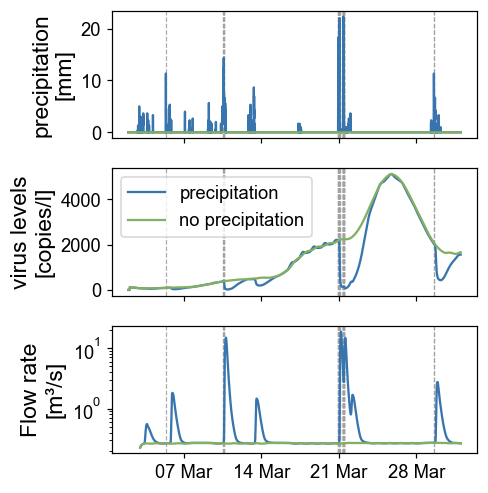

In [62]:
fig = visualize_precipitation_effect(manhole, max_date="2020-04-01")
fig.savefig(f"{plot_path}/precipitation_effect_{manhole}.png", bbox_inches="tight", dpi=300)

In [17]:
def visualize_precipitation_effect_PMMoV(manhole):
    df_rain_sub = df_rain[(df_rain["variable"] == "PMMoV") & (df_rain["manhole"]==manhole)].copy()
    df_rain_sub["location"] = df_rain_sub["manhole"].map(manhole_names)

    df_no_rain_sub = df_no_rain[(df_no_rain["variable"] == "PMMoV") & (df_no_rain["manhole"]==manhole)].copy()
    df_no_rain_sub["location"] = df_no_rain_sub["manhole"].map(manhole_names)

    df_measurements_sub = df_measurements[(df_measurements["Location"]==manhole_names[manhole])].copy()

    high_rain_dates = precipitation[precipitation["rain"] > 14]["date"]

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 8), sharex=True)

    # Add vertical dashed lines to all subplots
    for ax in axes:
        for date in high_rain_dates:
            ax.axvline(x=date, color='silver', linestyle='--', linewidth=1, alpha=0.9)

    axes[0].plot(df_no_rain_sub["Date"], df_no_rain_sub["value"], color="sienna")
    axes[1].plot(precipitation["date"], precipitation["rain"], color="darkblue")
    axes[2].plot(df_rain_sub["Date"], df_rain_sub["value"], color="cadetblue")

    for ax in axes:
        ax.set_ylim(0)
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    axes[0].set_ylabel("PMMoV [copies/l]\n(no precipitation)")
    axes[1].set_ylabel("precipitation [mm]")
    axes[2].set_ylabel("PMMoV [copies/l]\n(precipitation)")

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year
    fig.suptitle(f"Effect of precipitation at {manhole_names[manhole]}")

    plt.tight_layout()
    plt.show()

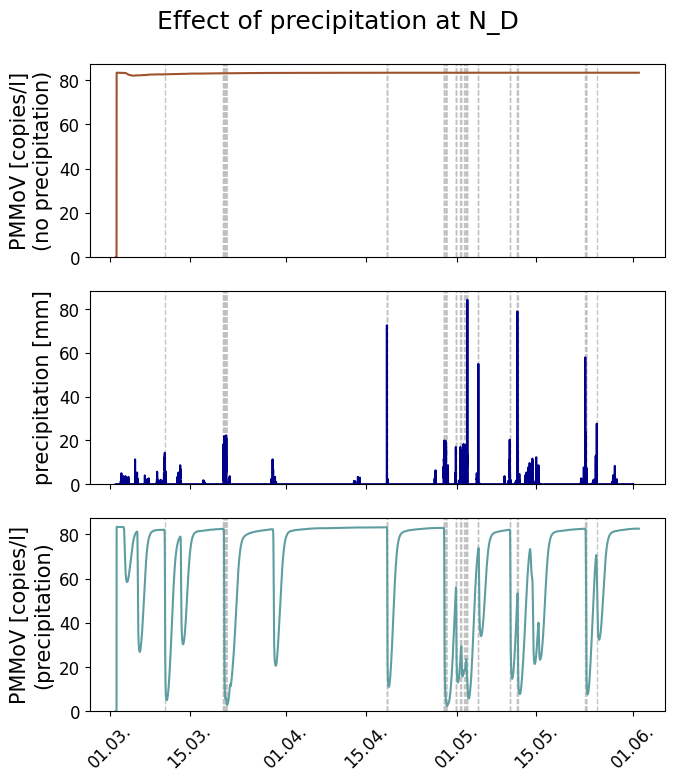

In [18]:
# N_D
manhole = "MUC562"

visualize_precipitation_effect_PMMoV(manhole)

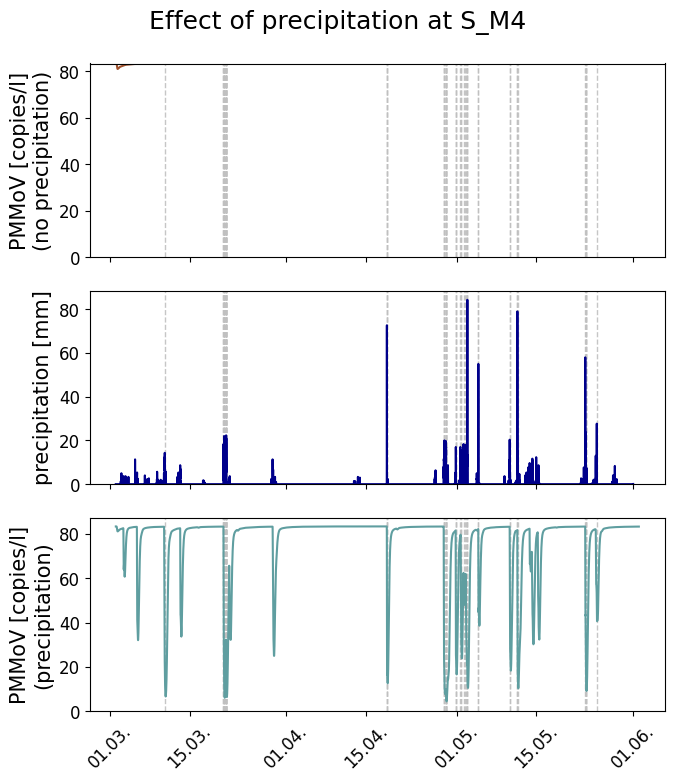

In [19]:
# S_M4
manhole = "MUC362"

visualize_precipitation_effect_PMMoV(manhole)